<a href="https://colab.research.google.com/github/thais-silva/Trabalhos/blob/main/Trabalho_Pipeline_Germinativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`*Formatação do arquivo txt e salvar com extensão avinput*`**
---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
mkdir /content/germinativas

In [4]:
cd /content/germinativas

/content/germinativas


In [5]:
pwd

'/content/germinativas'

In [6]:
with open('/content/drive/Shareddrives/T3-2021/Thais_Alves/Trabalho_Germinativas/Variantes_germinativas_variants.txt','r') as file:
  for line in file.readlines():
    colunas = line.split()
    
    if not 'POS' in colunas[1]:
      colunas[0] = colunas[0][3:]
      for n in colunas[2]:
        x = colunas[1]
        n = (int(x) + len(colunas[4]) - 1)
        colunas[2] = str(n)
        variantes = open('variante1.avinput','a',1,None,None,'')
        variantes.write(f'{colunas[0]} {colunas[1]} {colunas[2]} {colunas[3]} {colunas[4]}\n')
        
       
variantes.close()
     

In [7]:
!head /content/germinativas/variante1.avinput

1 94049574 94049574 C A
10 114910883 114910883 G A
12 116418553 116418554 A AC
9 14150143 14150143 C T
11 66254814 66254814 G A
10 114901076 114901076 G A
14 93286182 93286182 G C
18 44603833 44603833 G C
2 32168370 32168370 C T
10 68535201 68535201 C A


**`*Anotação de Variantes*`**
---



Dowload do ANNOVAR

---



In [8]:
!wget https://github.com/Varstation/POS-BIOINFO/raw/master/annovar/annovar.zip

--2022-04-12 19:45:38--  https://github.com/Varstation/POS-BIOINFO/raw/master/annovar/annovar.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Varstation/POS-BIOINFO/master/annovar/annovar.zip [following]
--2022-04-12 19:45:38--  https://raw.githubusercontent.com/Varstation/POS-BIOINFO/master/annovar/annovar.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5281524 (5.0M) [application/zip]
Saving to: ‘annovar.zip’

annovar.zip         100%[===================>]   5.04M  --.-KB/s    in 0.08s   

2022-04-12 19:45:38 (62.5 MB/s) - ‘annovar.zip’ saved [5281524/5281524]



Descompactação do ANNOVAR

---



In [9]:
%%bash
unzip annovar.zip
rm annovar.zip

Archive:  annovar.zip
   creating: annovar/
  inflating: __MACOSX/._annovar      
  inflating: annovar/coding_change.pl  
  inflating: annovar/variants_reduction.pl  
  inflating: annovar/retrieve_seq_from_fasta.pl  
  inflating: annovar/annotate_variation.pl  
   creating: annovar/example/
  inflating: annovar/convert2annovar.pl  
  inflating: annovar/table_annovar.pl  
   creating: annovar/humandb/
  inflating: annovar/example/gene_xref.txt  
  inflating: annovar/example/grantham.matrix  
  inflating: annovar/example/example.tab_region  
  inflating: annovar/example/gene_fullxref.txt  
  inflating: annovar/example/ex2.vcf  
  inflating: annovar/example/README  
  inflating: annovar/example/ex1.avinput  
  inflating: annovar/example/snplist.txt  
  inflating: annovar/example/example.simple_region  


Download das bases de dados do Annovar para o hg19 (genoma de referência)


---


- refGene - anotação gene-based (localização e tipo)
- abraom - frequência genômica na população brasileira
- gnomad_exome - frequência populacional no exoma
- exac03 - frequência populacional no exoma
- avsnp147 - identificador de variantes
- dbnsfp30a - banco de preditores de risco de variantes no exoma (predição de patogenicidade)
- clinvar_20210123 - banco de dados de significância clínica  

In [10]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar refGene annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_refGene.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_refGeneMrna.fa.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_refGeneVersion.txt.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


In [11]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar abraom annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_abraom.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_abraom.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


In [12]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar gnomad_exome annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_gnomad_exome.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_gnomad_exome.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


In [13]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar exac03 annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_exac03.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_exac03.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


In [14]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar avsnp147 annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_avsnp147.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_avsnp147.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


In [15]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar dbnsfp30a annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_dbnsfp30a.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_dbnsfp30a.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


In [16]:
!perl annovar/annotate_variation.pl -buildver hg19 -downdb -webfrom annovar clinvar_20210123 annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_clinvar_20210123.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg19_clinvar_20210123.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg19 build version, with files saved at the 'annovar/humandb' directory


**`*Anotação de Variantes*`**
---



In [17]:
!mkdir dados

In [18]:
%%bash
cd dados
pwd

/content/germinativas/dados


In [19]:
! perl annovar/table_annovar.pl --help

Usage:
     table_annovar.pl [arguments] <query-file> <database-location>

     Optional arguments:
            -h, --help                      print help message
            -m, --man                       print complete documentation
            -v, --verbose                   use verbose output
                --protocol <string>         comma-delimited string specifying database protocol
                --operation <string>        comma-delimited string specifying type of operation
                --outfile <string>          output file name prefix
                --buildver <string>         genome build version (default: hg18)
                --remove                    remove all temporary files
                --(no)checkfile             check if database file exists (default: ON)
                --genericdbfile <files>     specify comma-delimited generic db files
                --gff3dbfile <files>        specify comma-delimited GFF3 files
                --bedfile <files>    

In [20]:
#table_annovar.pl example/ex1.avinput humandb/ -buildver hg19 -out myanno -remove -protocol refGene,cytoBand,dbnsfp30a -operation g,r,f -nastring . -csvout -polish -xreffile example/gene_fullxref.txt
!perl annovar/table_annovar.pl /content/germinativas/variante1.avinput \
annovar/humandb/ --dot2underline -buildver hg19 \
-out /content/germinativas/dados/Trabalho1 -remove \
-protocol refGene,avsnp147,exac03,clinvar_20210123,dbnsfp30a,abraom,gnomad_exome \
-operation g,f,f,f,f,f,f -nastring "." -csvout -polish

-----------------------------------------------------------------
NOTICE: Processing operation=g protocol=refGene

NOTICE: Running with system command <annotate_variation.pl -geneanno -buildver hg19 -dbtype refGene -outfile /content/germinativas/dados/Trabalho1.refGene -exonsort -nofirstcodondel /content/germinativas/variante1.avinput annovar/humandb/>
NOTICE: Output files are written to /content/germinativas/dados/Trabalho1.refGene.variant_function, /content/germinativas/dados/Trabalho1.refGene.exonic_variant_function
NOTICE: Reading gene annotation from annovar/humandb/hg19_refGene.txt ... Done with 78239 transcripts (including 18578 without coding sequence annotation) for 28293 unique genes
NOTICE: Processing next batch with 14352 unique variants in 14352 input lines
NOTICE: Reading FASTA sequences from annovar/humandb/hg19_refGeneMrna.fa ... Done with 19572 sequences
NOTICE: Variants with invalid input format are written to /content/germinativas/dados/Trabalho1.refGene.invalid_inpu

In [21]:
!ls /content/germinativas/dados

Trabalho1.hg19_multianno.csv  Trabalho1.refGene.invalid_input
Trabalho1.invalid_input


In [22]:
! head /content/germinativas/dados/Trabalho1.hg19_multianno.csv

Chr,Start,End,Ref,Alt,Func_refGene,Gene_refGene,GeneDetail_refGene,ExonicFunc_refGene,AAChange_refGene,avsnp147,ExAC_ALL,ExAC_AFR,ExAC_AMR,ExAC_EAS,ExAC_FIN,ExAC_NFE,ExAC_OTH,ExAC_SAS,CLNALLELEID,CLNDN,CLNDISDB,CLNREVSTAT,CLNSIG,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,Polyphen2_HVAR_score,Polyphen2_HVAR_pred,LRT_score,LRT_pred,MutationTaster_score,MutationTaster_pred,MutationAssessor_score,MutationAssessor_pred,FATHMM_score,FATHMM_pred,PROVEAN_score,PROVEAN_pred,VEST3_score,CADD_raw,CADD_phred,DANN_score,fathmm-MKL_coding_score,fathmm-MKL_coding_pred,MetaSVM_score,MetaSVM_pred,MetaLR_score,MetaLR_pred,integrated_fitCons_score,integrated_confidence_value,GERP++_RS,phyloP7way_vertebrate,phyloP20way_mammalian,phastCons7way_vertebrate,phastCons20way_mammalian,SiPhy_29way_logOdds,abraom_freq,abraom_filter,abraom_cegh_filter,gnomAD_exome_ALL,gnomAD_exome_AFR,gnomAD_exome_AMR,gnomAD_exome_ASJ,gnomAD_exome_EAS,gnomAD_exome_FIN,gnomAD_exome_NFE,gnomAD_exome_OTH,gnomAD_exom

In [23]:
! head /content/germinativas/dados/Trabalho1.refGene.invalid_input
! wc -l /content/germinativas/dados/Trabalho1.refGene.invalid_input

12 116418553 116418554 A AC
15 43694048 43694048 TGTAA T
21 38877891 38877891 AGGTCTGTGCTGCTGC A
12 93792632 93792633 G GT
3 56627767 56627767 AAAGT A
3 97611837 97611837 TGTGA T
22 41564872 41564873 G GT
17 60650729 60650730 G GT
12 31240918 31240932 G GCCCGGGCCTGTCCC
14 21895989 21895989 ACTCTTGCACGTCCCATCACAGTAGCAAGGAGTACTCACTTGAGCTTG A
1437 /content/germinativas/dados/Trabalho1.refGene.invalid_input


**`*Análise das Variantes Anotadas*`**
---



Importação das bibliotecas




In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Contagem do número de variantes

In [25]:
#Número de variantes anotadas
!wc -l /content/germinativas/dados/Trabalho1.hg19_multianno.csv

15790 /content/germinativas/dados/Trabalho1.hg19_multianno.csv


Importação dos dados do annovar para do dataframe do python

In [26]:
!pwd

/content/germinativas


In [27]:
# Ler o csv na variante df, utilizando o tab como separador, com a biblioteca pandas
df = pd.read_csv("/content/germinativas/dados/Trabalho1.hg19_multianno.csv", sep=",")
df.tail()

,Chr,Start,End,Ref,Alt,Func_refGene,Gene_refGene,GeneDetail_refGene,ExonicFunc_refGene,AAChange_refGene,...,abraom_cegh_filter,gnomAD_exome_ALL,gnomAD_exome_AFR,gnomAD_exome_AMR,gnomAD_exome_ASJ,gnomAD_exome_EAS,gnomAD_exome_FIN,gnomAD_exome_NFE,gnomAD_exome_OTH,gnomAD_exome_SAS
15784,1,86173504,86173504,T,A,exonic,ZNHIT6,.,nonsynonymous SNV,"ZNHIT6:NM_017953:exon1:c.A464T:p.E155V,ZNHIT6:...",...,.,.,.,.,.,.,.,.,.,.
15785,15,100272044,100272044,T,C,exonic,LYSMD4,.,nonsynonymous SNV,"LYSMD4:NM_001284417:exon2:c.A161G:p.E54G,LYSMD...",...,.,.,.,.,.,.,.,.,.,.
15786,13,21370323,21370323,G,A,exonic,XPO4,.,stopgain,"XPO4:NM_001372061:exon18:c.C2689T:p.Q897X,XPO4...",...,.,.,.,.,.,.,.,.,.,.
15787,17,57093092,57093092,C,T,exonic,TRIM37,.,nonsynonymous SNV,"TRIM37:NM_001353085:exon19:c.G1993A:p.G665S,TR...",...,.,4.064e-06,0,0,0,5.798e-05,0,0,0,0
15788,21,44273814,44273814,C,A,exonic,WDR4,.,nonsynonymous SNV,"WDR4:NM_001260474:exon9:c.G837T:p.L279F,WDR4:N...",...,.,.,.,.,.,.,.,.,.,.


In [28]:
df.to_excel('variantes_anotadas.xlsx')

Junção da planilha com as variantes anotadas e da planilha com dados fenotípicos

In [29]:
# Ler as primeiras linhas do csv com as informações fenotípicas
! head /content/drive/Shareddrives/T3-2021/Thais_Alves/Trabalho_Germinativas/Variantes_germinativas_tabelas.csv

﻿DataSet;Variant;Child_ID;Phenotype_ID;Dad_ID;Mom_ID;Child_Sex;Affected_Status
ASC_v15_VCF;1:94049574:C:A;13069.s1;13069.s1;13069.fa;13069.mo;Male;1
ASC_v15_VCF;10:114910883:G:A;35906;12090.p1;35900;35902;Female;2
ASC_v15_VCF;12:116418553:A:AC;SSC05997;12969.p1;SSC06008;SSC06001;Male;2
ASC_v15_VCF;9:14150143:C:T;36153;14385.p1;36147;36149;Female;2
ASC_v15_VCF;11:66254814:G:A;AU190A;AU190A;AU190B;AU190C;Male;2
ASC_v15_VCF;10:114901076:G:A;13069.p1;13069.p1;13069.fa;13069.mo;Male;2
ASC_v15_VCF;14:93286182:G:C;SSC09117;13047.p1;SSC07740;SSC09122;Male;2
ASC_v15_VCF;18:44603833:G:C;5929;11872.p1;5865;5897;Female;2
ASC_v15_VCF;2:32168370:C:T;SSC08980;13630.p1;SSC08986;SSC08983;Male;2


In [32]:
# Inserir a coluna Variant no arquivo de anotação
# Fazer o merge entre dois arquivos através de dados em comum
#df['Variant'] = df['Chr'] + ':' + df['Start'].astype(str) + ':' + df['Ref'] + ':' + df['Alt']
df2 = pd.read_csv("/content/drive/Shareddrives/T3-2021/Thais_Alves/Trabalho_Germinativas/Variantes_germinativas_tabelas.csv", sep=";")
df3 = pd.concat([df,df2], axis=1)
df3

,Chr,Start,End,Ref,Alt,Func_refGene,Gene_refGene,GeneDetail_refGene,ExonicFunc_refGene,AAChange_refGene,...,gnomAD_exome_OTH,gnomAD_exome_SAS,DataSet,Variant,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status
0,1,94049574,94049574,C,A,splicing,BCAR3,NM_003567:exon6:c.1033+1G>T;NM_001261410:exon4...,.,.,...,.,.,ASC_v15_VCF,1:94049574:C:A,13069.s1,13069.s1,13069.fa,13069.mo,Male,1
1,10,114910883,114910883,G,A,splicing,TCF7L2,NM_030756:exon8:c.932+1G>A;NM_001198529:exon8:...,.,.,...,0,0,ASC_v15_VCF,10:114910883:G:A,35906,12090.p1,35900,35902,Female,2
2,12,116418553,116418554,A,AC,.,.,.,.,.,...,.,.,ASC_v15_VCF,12:116418553:A:AC,SSC05997,12969.p1,SSC06008,SSC06001,Male,2
3,9,14150143,14150143,C,T,splicing,NFIB,NM_001282787:exon4:c.50+1G>A;NM_001190738:exon...,.,.,...,.,.,ASC_v15_VCF,9:14150143:C:T,36153,14385.p1,36147,36149,Female,2
4,11,66254814,66254814,G,A,splicing,DPP3,NM_005700:exon5:c.573+1G>A;NM_001256670:exon4:...,.,.,...,.,.,ASC_v15_VCF,11:66254814:G:A,AU190A,AU190A,AU190B,AU190C,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15784,1,86173504,86173504,T,A,exonic,ZNHIT6,.,nonsynonymous SNV,"ZNHIT6:NM_017953:exon1:c.A464T:p.E155V,ZNHIT6:...",...,.,.,De_Rubeis_Nature_2014,1:86173504:T:A,NDAR_INVXF966VTK_wes1,NDAR_INVXF966VTK_wes1,NDAR_INVYC323JAF_wes1,NDAR_INVKR827HBV_wes1,Male,2
15785,15,100272044,100272044,T,C,exonic,LYSMD4,.,nonsynonymous SNV,"LYSMD4:NM_001284417:exon2:c.A161G:p.E54G,LYSMD...",...,.,.,SSC_Krumm_NatureGenetics2015,15:100272044:T:C,12820.p1,12820.p1,12820.fa,12820.mo,Male,2
15786,13,21370323,21370323,G,A,exonic,XPO4,.,stopgain,"XPO4:NM_001372061:exon18:c.C2689T:p.Q897X,XPO4...",...,.,.,SSC_Krumm_NatureGenetics2015,13:21370323:G:A,13017.p1,13017.p1,13017.fa,13017.mo,Male,2
15787,17,57093092,57093092,C,T,exonic,TRIM37,.,nonsynonymous SNV,"TRIM37:NM_001353085:exon19:c.G1993A:p.G665S,TR...",...,0,0,Werling_WGS_call,17:57093092:C:T,13784.p1,13784.p1,13784.fa,13784.mo,Male,2


Análise da categoria funcional

In [33]:
df3['Func_refGene'].value_counts()

exonic                   9468
intronic                 3568
.                        1437
intergenic                389
UTR3                      232
ncRNA_exonic              166
splicing                  163
UTR5                      163
ncRNA_intronic            154
upstream                   30
downstream                  9
exonic;splicing             5
UTR5;UTR3                   2
ncRNA_exonic;splicing       1
ncRNA_splicing              1
upstream;downstream         1
Name: Func_refGene, dtype: int64

In [34]:
df3['ExonicFunc_refGene'].value_counts()

nonsynonymous SNV    6427
.                    6316
synonymous SNV       2479
stopgain              459
unknown                85
startloss              19
stoploss                4
Name: ExonicFunc_refGene, dtype: int64

In [35]:
df3['Affected_Status'].value_counts()

2    12166
1     3623
Name: Affected_Status, dtype: int64

In [36]:
df3[["Func_refGene", "ExonicFunc_refGene"]].describe()

,Func_refGene,ExonicFunc_refGene
count,15789,15789
unique,16,7
top,exonic,nonsynonymous SNV
freq,9468,6427


Filtrar as variantes de interesse clínico

In [37]:
 df_exonic = df3.query("Func_refGene == 'exonic' or Func_refGene == 'ncRNA_exonic' or Func_refGene == 'splicing' or Func_refGene == 'exonic;splicing' or Func_refGene == 'ncRNA_exonic;splicing' or Func_refGene == 'ncRNA_splicing'")
 df_exonic.head()

,Chr,Start,End,Ref,Alt,Func_refGene,Gene_refGene,GeneDetail_refGene,ExonicFunc_refGene,AAChange_refGene,...,gnomAD_exome_OTH,gnomAD_exome_SAS,DataSet,Variant,Child_ID,Phenotype_ID,Dad_ID,Mom_ID,Child_Sex,Affected_Status
0,1,94049574,94049574,C,A,splicing,BCAR3,NM_003567:exon6:c.1033+1G>T;NM_001261410:exon4...,.,.,...,.,.,ASC_v15_VCF,1:94049574:C:A,13069.s1,13069.s1,13069.fa,13069.mo,Male,1
1,10,114910883,114910883,G,A,splicing,TCF7L2,NM_030756:exon8:c.932+1G>A;NM_001198529:exon8:...,.,.,...,0,0,ASC_v15_VCF,10:114910883:G:A,35906,12090.p1,35900,35902,Female,2
3,9,14150143,14150143,C,T,splicing,NFIB,NM_001282787:exon4:c.50+1G>A;NM_001190738:exon...,.,.,...,.,.,ASC_v15_VCF,9:14150143:C:T,36153,14385.p1,36147,36149,Female,2
4,11,66254814,66254814,G,A,splicing,DPP3,NM_005700:exon5:c.573+1G>A;NM_001256670:exon4:...,.,.,...,.,.,ASC_v15_VCF,11:66254814:G:A,AU190A,AU190A,AU190B,AU190C,Male,2
5,10,114901076,114901076,G,A,splicing,TCF7L2,NM_030756:exon5:c.616+1G>A;NM_001198529:exon5:...,.,.,...,.,.,ASC_v15_VCF,10:114901076:G:A,13069.p1,13069.p1,13069.fa,13069.mo,Male,2


In [38]:
df_exonic['ExonicFunc_refGene'].value_counts()

nonsynonymous SNV    6427
synonymous SNV       2479
stopgain              459
.                     331
unknown                85
startloss              19
stoploss                4
Name: ExonicFunc_refGene, dtype: int64

Remoção das variantes sinônimas e desconhecidas → variantes de interesse clínico

In [39]:
df_no_sinonima = df_exonic[df_exonic["ExonicFunc_refGene"] != "synonymous SNV"]
df_no_sinonima = df_no_sinonima[df_no_sinonima["ExonicFunc_refGene"] != "unknown"]
df_no_sinonima[["Func_refGene", "ExonicFunc_refGene"]].describe()

,Func_refGene,ExonicFunc_refGene
count,7240,7240
unique,6,5
top,exonic,nonsynonymous SNV
freq,6904,6427


Separação das variantes de interesse clínico encontradas em autistas e nos irmãos não-autistas

In [40]:
df_autista = df_no_sinonima[df_no_sinonima["Affected_Status"] == 2]

In [41]:
tabela_1 = df_autista[["Func_refGene", "ExonicFunc_refGene"]].describe()
tabela_1

,Func_refGene,ExonicFunc_refGene
count,5534,5534
unique,6,5
top,exonic,nonsynonymous SNV
freq,5265,4868


In [42]:
df_irmao_nao_autista = df_no_sinonima[df_no_sinonima['Affected_Status'] == 1]

In [43]:
tabela_2 = df_irmao_nao_autista[["Func_refGene", "ExonicFunc_refGene"]].describe()
tabela_2

,Func_refGene,ExonicFunc_refGene
count,1706,1706
unique,3,5
top,exonic,nonsynonymous SNV
freq,1639,1559


In [47]:
tabela = tabela_1.compare(tabela_2, keep_shape=True, keep_equal=True)
tabela

Func_refGene         ExonicFunc_refGene                   
               self   other               self              other
count          5534    1706               5534               1706
unique            6       3                  5                  5
top          exonic  exonic  nonsynonymous SNV  nonsynonymous SNV
freq           5265    1639               4868               1559

In [49]:
tabela.to_excel('Tabela.xlsx',sheet_name='Análise Descritiva da classificação funcional das variantes de interesse clínico')

/usr/local/lib/python3.7/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Filtragem das variantes por classes funcionais

In [50]:
aut_Func = df_autista[["Func_refGene", "ExonicFunc_refGene"]].groupby("ExonicFunc_refGene").count()
df_autista[["Func_refGene", "ExonicFunc_refGene"]].groupby("ExonicFunc_refGene").count()

,Func_refGene
ExonicFunc_refGene,
.,264
nonsynonymous SNV,4868
startloss,14
stopgain,385
stoploss,3


In [51]:
df_autista.shape

(5534, 78)

In [52]:
no_aut_Func = df_irmao_nao_autista[["Func_refGene", "ExonicFunc_refGene"]].groupby("ExonicFunc_refGene").count()
df_irmao_nao_autista[["Func_refGene", "ExonicFunc_refGene"]].groupby("ExonicFunc_refGene").count()

,Func_refGene
ExonicFunc_refGene,
.,67
nonsynonymous SNV,1559
startloss,5
stopgain,74
stoploss,1


In [53]:
df_irmao_nao_autista.shape

(1706, 78)

In [54]:
tabela_Func = aut_Func.compare(no_aut_Func, keep_equal=True)
tabela_Func

Func_refGene      
                           self other
ExonicFunc_refGene                   
.                           264    67
nonsynonymous SNV          4868  1559
startloss                    14     5
stopgain                    385    74
stoploss                      3     1

In [55]:
with pd.ExcelWriter('Tabela.xlsx',
...                     mode='a') as writer:  # doctest: +SKIP
...     tabela_Func.to_excel(writer, sheet_name='Comparação da classificação funcional das variantes exônicas')

/usr/local/lib/python3.7/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [56]:
tabela_refGene_autista = df_autista["Func_refGene"].value_counts()
tabela_refGene_autista

exonic                   5265
splicing                  138
ncRNA_exonic              124
exonic;splicing             5
ncRNA_exonic;splicing       1
ncRNA_splicing              1
Name: Func_refGene, dtype: int64

In [57]:
tabela_refGene_nao_autista = df_irmao_nao_autista["Func_refGene"].value_counts()
tabela_refGene_nao_autista

exonic          1639
ncRNA_exonic      42
splicing          25
Name: Func_refGene, dtype: int64

In [58]:
with pd.ExcelWriter('Tabela.xlsx',
...                     mode='a') as writer:  # doctest: +SKIP
...     tabela_refGene_autista.to_excel(writer, sheet_name='Autistas - Classificação das variantes de interesse clínico')
...     tabela_refGene_nao_autista.to_excel(writer, sheet_name='Não autistas - Classificação das variantes de interesse clínico')

/usr/local/lib/python3.7/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Text(0.5, 1.0, 'Tipos de variantes encontradas em indivíduos autistas')

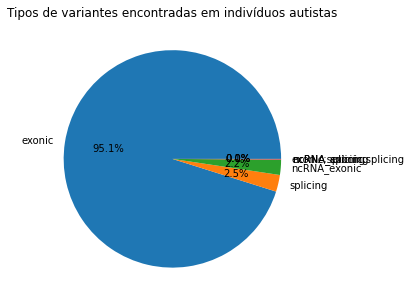

In [59]:
# criar figura do tamanho desejado
plt.figure(figsize=(5,5))
# selecionar a coluna "AF" e trocar 1 por homozigoto e 0.5 por heterozigoto
aut_refGene = df_autista["Func_refGene"]
# contar variantes het/hom e gerar gráfico de pizza
aut_refGene.value_counts().plot(kind="pie", autopct="%.1f%%")
# remover label no eixo Y (você pode remover essa linha e ver o que acontece)
plt.ylabel("")
# adicionar título
plt.title("Tipos de variantes encontradas em indivíduos autistas")

Text(0.5, 1.0, 'Tipos de variantes encontradas em irmãos não autistas')

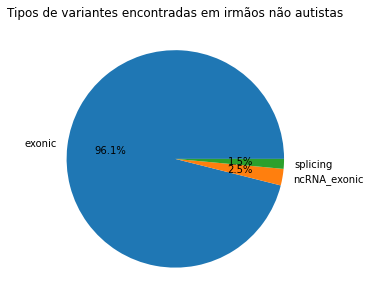

In [60]:
# criar figura do tamanho desejado
plt.figure(figsize=(5,5))
# selecionar a coluna "AF" e trocar 1 por homozigoto e 0.5 por heterozigoto
no_aut_refGene = df_irmao_nao_autista["Func_refGene"]
# contar variantes het/hom e gerar gráfico de pizza
no_aut_refGene.value_counts().plot(kind="pie", autopct="%.1f%%")
# remover label no eixo Y (você pode remover essa linha e ver o que acontece)
plt.ylabel("")
# adicionar título
plt.title("Tipos de variantes encontradas em irmãos não autistas")

Filtragem das variantes por score de predição
 - MutationTaster_pred

In [61]:
tabela_pred_autista = df_autista["MutationTaster_pred"].value_counts(sort=False)
tabela_pred_autista

D    3542
N    1467
.     211
A     310
P       4
Name: MutationTaster_pred, dtype: int64

In [62]:
tabela_pred_irmao_nao_autista = df_irmao_nao_autista["MutationTaster_pred"].value_counts()
tabela_pred_irmao_nao_autista

D    1058
N     530
.      62
A      55
P       1
Name: MutationTaster_pred, dtype: int64

In [63]:
Tabela_Patogenicas = tabela_pred_autista.compare(tabela_pred_irmao_nao_autista, keep_shape=True, keep_equal=True)
Tabela_Patogenicas

,self,other
D,3542,1058
N,1467,530
.,211,62
A,310,55
P,4,1


In [64]:
with pd.ExcelWriter('Tabela.xlsx',
...                     mode='a') as writer:
...     Tabela_Patogenicas.to_excel(writer, sheet_name='Classificação da predição de patogenicidade')

/usr/local/lib/python3.7/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [65]:
df_patogenicas_autista = df_autista.query("MutationTaster_pred == 'A' or MutationTaster_pred == 'D'")
df_patogenicas_autista["MutationTaster_pred"].value_counts()

D    3542
A     310
Name: MutationTaster_pred, dtype: int64

In [66]:
df_patogenicas_irmao_nao_autista = df_irmao_nao_autista.query("MutationTaster_pred == 'A' or MutationTaster_pred == 'D'")
df_patogenicas_irmao_nao_autista["MutationTaster_pred"].value_counts()

D    1058
A      55
Name: MutationTaster_pred, dtype: int64

In [67]:
df_patogenicas_autista['Child_ID'].value_counts()

20-1301909-05           5
5312                    5
200675492@1082035067    5
1360JS0006              5
SSC02682                4
                       ..
ASC_CA_142_A            1
SSC10056                1
DEASD_0273_001          1
09C79891                1
13017.p1                1
Name: Child_ID, Length: 2857, dtype: int64

In [68]:
df_patogenicas_irmao_nao_autista['Child_ID'].value_counts()

14637.s1    5
68509       5
35968       4
13203.s1    4
12673.s1    4
           ..
SSC00617    1
SSC12006    1
SSC02429    1
SSC03087    1
14440.s1    1
Name: Child_ID, Length: 858, dtype: int64

Diagrama de Venn → variantes conhecidas não sinônimas, de ganho ou perda de códon de iniciação ou parada em comum entre os autistas e os irmãos não autistas

In [69]:
from matplotlib_venn import venn2

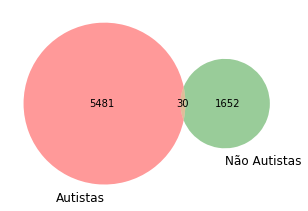

In [70]:
plt.figure(figsize=(5,5))
set1 = set(df_autista['Variant'])
set2 = set(df_irmao_nao_autista['Variant'])

venn2([set1, set2], ('Autistas', 'Não Autistas'))
plt.show()

Diagrama de Venn → variantes totais em comum entre os autistas e os irmãos não autistas

In [71]:
df_total_autistas = df3[df3["Affected_Status"] == 2]
df_total_irmao_nao_autista = df3[df3["Affected_Status"] == 1]

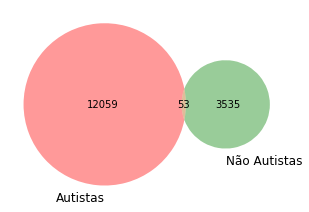

In [72]:
plt.figure(figsize=(5,5))
set3 = set(df_total_autistas['Variant'])
set4 = set(df_total_irmao_nao_autista['Variant'])

venn2([set3, set4], ('Autistas', 'Não Autistas'))
plt.show()

Diagrama de Venn → variantes patogênicas em comum entre os autistas e os irmãos não autistas

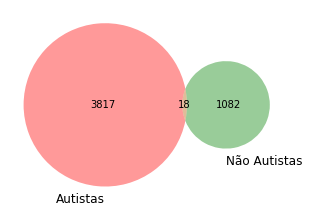

In [76]:
plt.figure(figsize=(5,5))
set5 = set(df_patogenicas_autista['Variant'])
set6 = set(df_patogenicas_irmao_nao_autista['Variant'])

venn2([set5, set6], ('Autistas', 'Não Autistas'))
plt.show()


# Testes Estatísticos

---



Número de indivíduos autistas: 6.430 (dado de QI de 4821)

Número de controles: 2.179

Total: 8.609


## *Proporção indivíduos autistas e irmãos não autistas com variantes de interesse clínico*

---





1.   Análise se a proporção de variantes de ponto exônicas de interesse clínico (não sinônimas, de ganho ou perda de de códon de início ou parada) é maior em indíviduos autistas do que em seus irmãos
2.   Análise se a proporção de variantes pontuais de frameshift (ganho ou perda de códon de iniciação ou parada) é maior em indivíduos autistas do que em seus irmãos


In [77]:
TOTAL_AUTISTAS = 6430
TOTAL_NAO_AUTISTAS = 2179

ind_autista = df_autista['Child_ID'].drop_duplicates().count()
irmao_nao_autista = df_irmao_nao_autista['Child_ID'].drop_duplicates().count()

prop_individuos_autistas = ind_autista/TOTAL_AUTISTAS
prop_irmaos_nao_autistas = irmao_nao_autista/TOTAL_NAO_AUTISTAS
print(f'Entre indivíduos com variantes de interesse clínico, a proporção de indivíduos autistas é {prop_individuos_autistas} e de irmãos não autistas é {prop_irmaos_nao_autistas}')

Entre indivíduos com variantes de interesse clínico, a proporção de indivíduos autistas é 0.5639191290824261 e de irmãos não autistas é 0.5300596603946764


In [78]:
#1. Tabela de Contingência com variantes de interesse clínico
contingency_table = pd.DataFrame([{'variantes_não_sinônimas': 0, 'variantes_sinônimas_ou_desconhecidas': 0}], index =['autistas', 'nao_autistas'])
contingency_table['variantes_não_sinônimas'].autistas = ind_autista
contingency_table['variantes_sinônimas_ou_desconhecidas'].autistas = TOTAL_AUTISTAS - ind_autista
contingency_table['variantes_não_sinônimas'].nao_autistas = irmao_nao_autista
contingency_table['variantes_sinônimas_ou_desconhecidas'].nao_autistas =  TOTAL_NAO_AUTISTAS - irmao_nao_autista
contingency_table

,variantes_não_sinônimas,variantes_sinônimas_ou_desconhecidas
autistas,3626,2804
nao_autistas,1155,1024


In [79]:
!pip install fisher


In [80]:
from fisher import pvalue
mat_1 = [[3626, 2804], [1155, 1024]]
p_1 = pvalue(3626, 2804, 1155, 1024)
p_1.left_tail, p_1.right_tail, p_1.two_tail
if p_1.right_tail < 0.05:
  print(f'A proporção de variantes exônicas de interesse clínico (conhecidas não sinônimas ou de ganho ou perda de códon de iniciação ou parada) é maior em indivíduos autistas pois p-value igual a {p_1.right_tail}')
else:
  print(f'A proporção de variantes exônicas de interesse clínico (conhecidas não sinônimas ou de ganho ou perda de códon de iniciação ou parada) NÃO é maior em indivíduos autistas pois p-value igual a {p_1.right_tail}')


A proporção de variantes exônicas de interesse clínico (conhecidas não sinônimas ou de ganho ou perda de códon de iniciação ou parada) é maior em indivíduos autistas pois p-value igual a 0.0032507324822265106


In [81]:
df_aut_nonsynonymous = df_autista[df_autista["ExonicFunc_refGene"] == 'nonsynonymous SNV']
df_aut_frameshift = df_autista.query("ExonicFunc_refGene == 'stopgain' or ExonicFunc_refGene == 'stoploss' or ExonicFunc_refGene == 'starloss'")
df_nao_aut_nonsynonymous = df_irmao_nao_autista.query("ExonicFunc_refGene == 'nonsynonymous SNV'")
df_nao_aut_frameshift =  df_irmao_nao_autista.query("ExonicFunc_refGene == 'stopgain' or ExonicFunc_refGene == 'stoploss' or ExonicFunc_refGene == 'starloss'")

In [82]:
ind_aut_nonsynonymous = df_aut_nonsynonymous['Child_ID'].drop_duplicates().count()
ind_aut_frameshift = df_aut_frameshift['Child_ID'].drop_duplicates().count()
ind_nao_aut_nonsynonymous = df_nao_aut_nonsynonymous['Child_ID'].drop_duplicates().count()
ind_nao_aut_frameshift = df_nao_aut_frameshift['Child_ID'].drop_duplicates().count()

In [83]:
#2. Tabela de Contingência com variantes de não sinônimas e variantes de frameshift (ganho ou perda de códon de iniciação ou parada)
contingency_table_frameshift = pd.DataFrame([{'variantes_frameshift': 0, 'variantes_não_sinônimas': 0}], index =['autistas', 'nao_autistas'])
contingency_table_frameshift['variantes_não_sinônimas'].autistas = ind_aut_nonsynonymous
contingency_table_frameshift['variantes_frameshift'].autistas = ind_aut_frameshift
contingency_table_frameshift['variantes_não_sinônimas'].nao_autistas = ind_nao_aut_nonsynonymous
contingency_table_frameshift['variantes_frameshift'].nao_autistas =  ind_nao_aut_frameshift
contingency_table_frameshift

,variantes_frameshift,variantes_não_sinônimas
autistas,376,3329
nao_autistas,73,1089


In [84]:
mat_2 = [[376, 3329], [73, 1089]]
p_2 = pvalue(376, 3329, 73, 1089)
p_2.left_tail, p_2.right_tail, p_2.two_tail
if p_2.right_tail < 0.05:
  print(f'A proporção de variantes exônicas de frameshift é maior em indivíduos autistas pois p-value igual a {p_2.right_tail}')
else:
  print(f'A proporção de variantes exônicas de frameshift NÃO é maior em indivíduos autistas pois p-value igual a {p_2.right_tail}')

A proporção de variantes exônicas de frameshift é maior em indivíduos autistas pois p-value igual a 2.4760400462910347e-05


## *Proporção indivíduos autistas e irmãos não autistas com variantes patogênicas*

---





1.   Análise se a proporção de variantes patogênicas é maior em indíviduos autistas do que em seus irmãos

In [85]:
ind_autista_patog = df_patogenicas_autista['Child_ID'].drop_duplicates().count()
irmao_nao_autista_patog = df_patogenicas_irmao_nao_autista['Child_ID'].drop_duplicates().count()
print(ind_autista_patog, irmao_nao_autista_patog)

2857 858


In [86]:
#Tabela de Contingência com variantes patogênicas
contingency_table_pathogenic = pd.DataFrame([{'variantes_patogênicas': 0, 'variantes_não_patogênicas': 0}], index =['autistas', 'nao_autistas'])
contingency_table_pathogenic['variantes_patogênicas'].autistas = ind_autista_patog
contingency_table_pathogenic['variantes_não_patogênicas'].autistas = TOTAL_AUTISTAS - ind_autista_patog
contingency_table_pathogenic['variantes_patogênicas'].nao_autistas = irmao_nao_autista_patog
contingency_table_pathogenic['variantes_não_patogênicas'].nao_autistas =  TOTAL_NAO_AUTISTAS - irmao_nao_autista_patog
contingency_table_pathogenic

,variantes_patogênicas,variantes_não_patogênicas
autistas,2857,3573
nao_autistas,858,1321


In [87]:
mat_3 = [[2857, 3573], [858, 1321]]
p_3 = pvalue(2857, 3573, 858, 1321)
p_3.left_tail, p_3.right_tail, p_3.two_tail
if p_3.right_tail < 0.05:
  print(f'A proporção de variantes patogênicas é maior em indivíduos autistas pois p-value igual a {p_3.right_tail}')
else:
  print(f'A proporção de variantes patogênicas NÃO é maior em indivíduos autistas pois p-value igual a {p_3.right_tail}')

A proporção de variantes patogênicas é maior em indivíduos autistas pois p-value igual a 2.0301955229782637e-05


In [88]:
#Proporção de indivíduos autistas (prop) e seus irmãos (prop_1) com variantes patogênicas
prop = ind_autista_patog/TOTAL_AUTISTAS
prop_1 = irmao_nao_autista_patog/TOTAL_NAO_AUTISTAS
print(prop,prop_1)

0.4443234836702955 0.3937586048646168


In [90]:
# Só executar no final do pipeline para copiar todos os dados para o drive
!cp -r /content/germinativas \
/content/drive/Shareddrives/T3-2021/Thais_Alves/Trabalho_Germinativas/